In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Set Matplotlib style for better visuals

In [2]:
plt.style.use('ggplot')
pd.set_option('display.max_columns', None)

# Load the dataset

In [3]:
file_path = '../data/togo-dapaong_qc.csv' # Assuming the file is in the current directory
df = pd.read_csv(file_path)

# Convert 'Timestamp' to datetime objects and set it as the index

In [4]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df = df.set_index('Timestamp')

# Display the first few rows and the DataFrame structure

In [5]:
print("Shape of the dataset:", df.shape)
print("\nFirst 5 rows of the dataset:")
display(df.head())
print("\nData Types:")
display(df.info())

Shape of the dataset: (525600, 18)

First 5 rows of the dataset:


,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
Timestamp,,,,,,,,,,,,,,,,,,
2021-10-25 00:01:00,-1.3,0.0,0.0,0.0,0.0,24.8,94.5,0.9,1.1,0.4,227.6,1.1,977,0,0.0,24.7,24.4,NaN
2021-10-25 00:02:00,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.1,1.6,0.4,229.3,0.7,977,0,0.0,24.7,24.4,NaN
2021-10-25 00:03:00,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.2,1.4,0.3,228.5,2.9,977,0,0.0,24.7,24.4,NaN
2021-10-25 00:04:00,-1.2,0.0,0.0,0.0,0.0,24.8,94.3,1.2,1.6,0.3,229.1,4.6,977,0,0.0,24.7,24.4,NaN
2021-10-25 00:05:00,-1.2,0.0,0.0,0.0,0.0,24.8,94.0,1.3,1.6,0.4,227.5,1.6,977,0,0.0,24.7,24.4,NaN



Data Types:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 525600 entries, 2021-10-25 00:01:00 to 2022-10-25 00:00:00
Data columns (total 18 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   GHI            525600 non-null  float64
 1   DNI            525600 non-null  float64
 2   DHI            525600 non-null  float64
 3   ModA           525600 non-null  float64
 4   ModB           525600 non-null  float64
 5   Tamb           525600 non-null  float64
 6   RH             525600 non-null  float64
 7   WS             525600 non-null  float64
 8   WSgust         525600 non-null  float64
 9   WSstdev        525600 non-null  float64
 10  WD             525600 non-null  float64
 11  WDstdev        525600 non-null  float64
 12  BP             525600 non-null  int64  
 13  Cleaning       525600 non-null  int64  
 14  Precipitation  525600 non-null  float64
 15  TModA          525600 non-null  float64
 16  TModB          525600 non-n

None

In [6]:
print("\n--- Missing Value Count (Percentage) ---")
missing_data = df.isnull().sum()
missing_percent = (df.isnull().sum() / len(df)) * 100
missing_table = pd.concat([missing_data, missing_percent], axis=1, keys=['Missing Count', 'Percent (%)'])
missing_table = missing_table[missing_table['Missing Count'] > 0].sort_values(by='Missing Count', ascending=False)
display(missing_table)

print("\n--- Duplicate Rows Check ---")
num_duplicates = df.duplicated().sum()
print(f"Number of duplicated rows: {num_duplicates}")
if num_duplicates > 0:
    df.drop_duplicates(inplace=True)
    print(f"Duplicates removed. New shape: {df.shape}")

print("\n--- Unique Values in Categorical/Discrete Columns ---")
# Check columns with few unique values (potential categorical/binary features)
for col in ['Cleaning', 'Precipitation', 'Comments']:
    if col in df.columns:
        print(f"'{col}' unique values: {df[col].unique()}")
        print(f"'{col}' value counts:\n{df[col].value_counts()}\n")


--- Missing Value Count (Percentage) ---


,Missing Count,Percent (%)
Comments,525600,100.0



--- Duplicate Rows Check ---
Number of duplicated rows: 3168
Duplicates removed. New shape: (522432, 18)

--- Unique Values in Categorical/Discrete Columns ---
'Cleaning' unique values: [0 1]
'Cleaning' value counts:
Cleaning
0    522151
1       281
Name: count, dtype: int64

'Precipitation' unique values: [0.  0.1 0.4 0.5 0.7 0.2 0.3 0.6 0.8 1.  1.4 1.2 0.9 1.1 1.6 1.5 1.9 1.8
 2.  1.3 1.7 2.3]
'Precipitation' value counts:
Precipitation
0.0    519099
0.1      2280
0.2       314
0.3       203
0.4       125
0.5        96
0.6        81
0.7        54
0.9        40
0.8        38
1.0        34
1.1        23
1.2        15
1.5         8
1.4         7
1.3         6
1.8         3
1.6         2
1.9         1
2.0         1
1.7         1
2.3         1
Name: count, dtype: int64

'Comments' unique values: [nan]
'Comments' value counts:
Series([], Name: count, dtype: int64)



In [7]:
numeric_features = df.select_dtypes(include=np.number).columns.tolist()
print("Statistical Summary of Numeric Features:")
display(df[numeric_features].describe().T)

Statistical Summary of Numeric Features:


,count,mean,std,min,25%,50%,75%,max
GHI,522432.0,231.960664,323.001745,-12.7,-2.2,3.3,445.900,1424.0
DNI,522432.0,152.175692,251.439300,0.0,0.0,0.0,250.300,1004.5
DHI,522432.0,117.150465,156.730889,0.0,0.0,3.8,216.900,805.7
ModA,522432.0,227.515696,317.817209,0.0,0.0,5.4,426.125,1380.0
ModB,522432.0,220.900034,308.388253,0.0,0.0,5.3,414.300,1367.0
Tamb,522432.0,27.777003,4.758601,14.9,24.2,27.3,31.100,41.4
RH,522432.0,54.799188,28.700364,3.3,26.4,59.0,80.500,99.8
WS,522432.0,2.382446,1.455398,0.0,1.4,2.2,3.200,16.1
WSgust,522432.0,3.249064,1.871351,0.0,1.9,3.0,4.400,23.1
WSstdev,522432.0,0.561120,0.266199,0.0,0.4,0.5,0.700,4.7


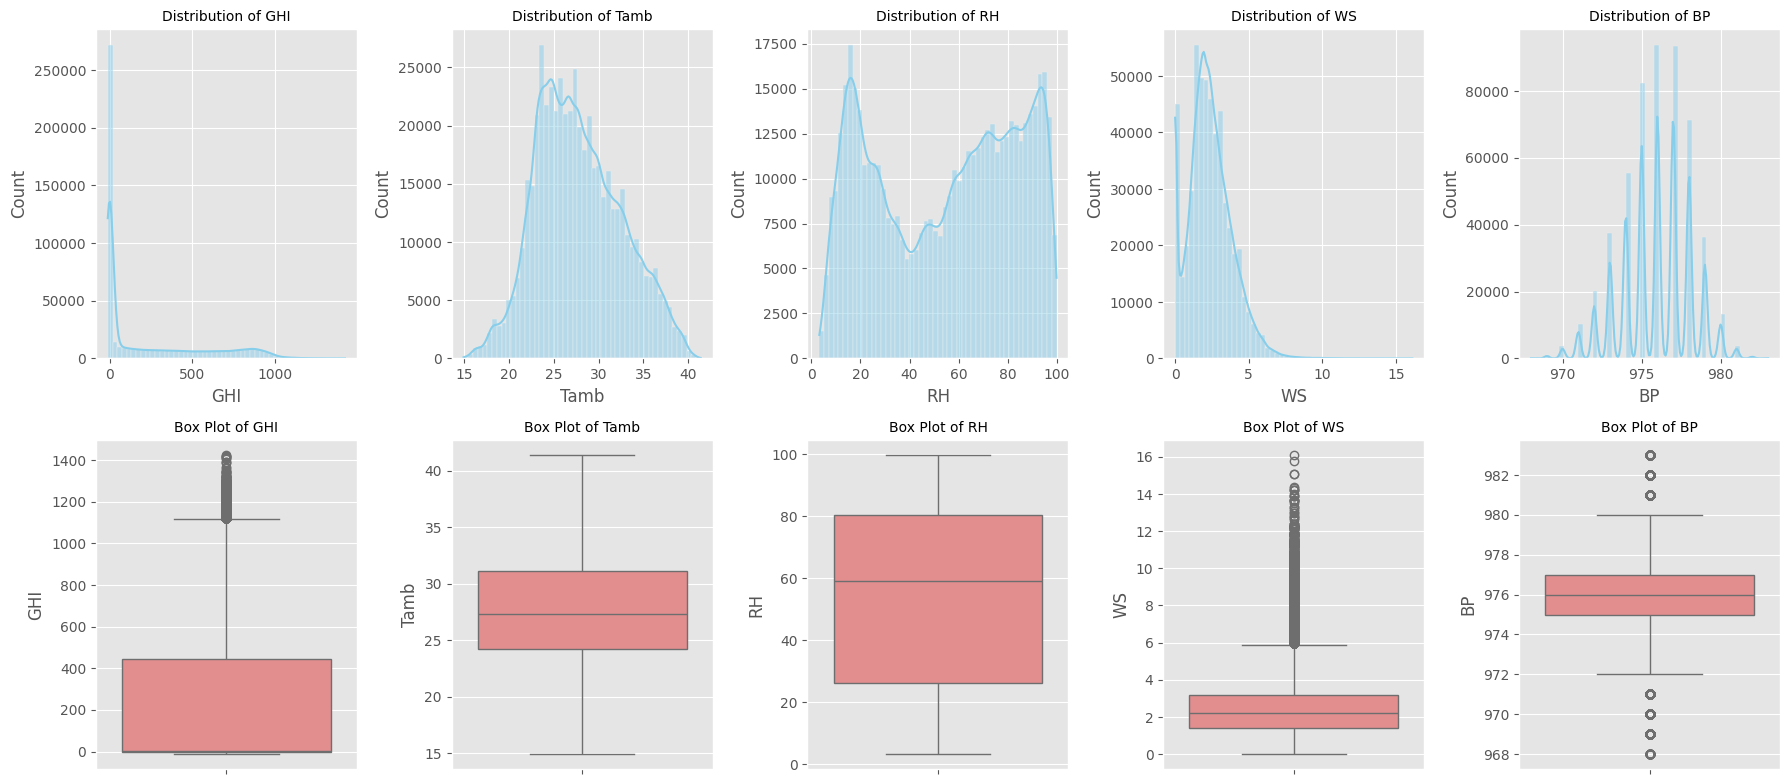

In [8]:
interesting_features = ['GHI', 'Tamb', 'RH', 'WS', 'BP']

plt.figure(figsize=(18, 12))
for i, col in enumerate(interesting_features):
    # Histogram/KDE
    plt.subplot(3, 5, i + 1)
    sns.histplot(df[col], kde=True, bins=50, color='skyblue')
    plt.title(f'Distribution of {col}', fontsize=10)
    plt.xlabel(col)

    # Box Plot
    plt.subplot(3, 5, i + 6)
    sns.boxplot(y=df[col], color='lightcoral')
    plt.title(f'Box Plot of {col}', fontsize=10)

plt.tight_layout()
plt.show()

## Bivariate Analysis: Correlation Heatmap

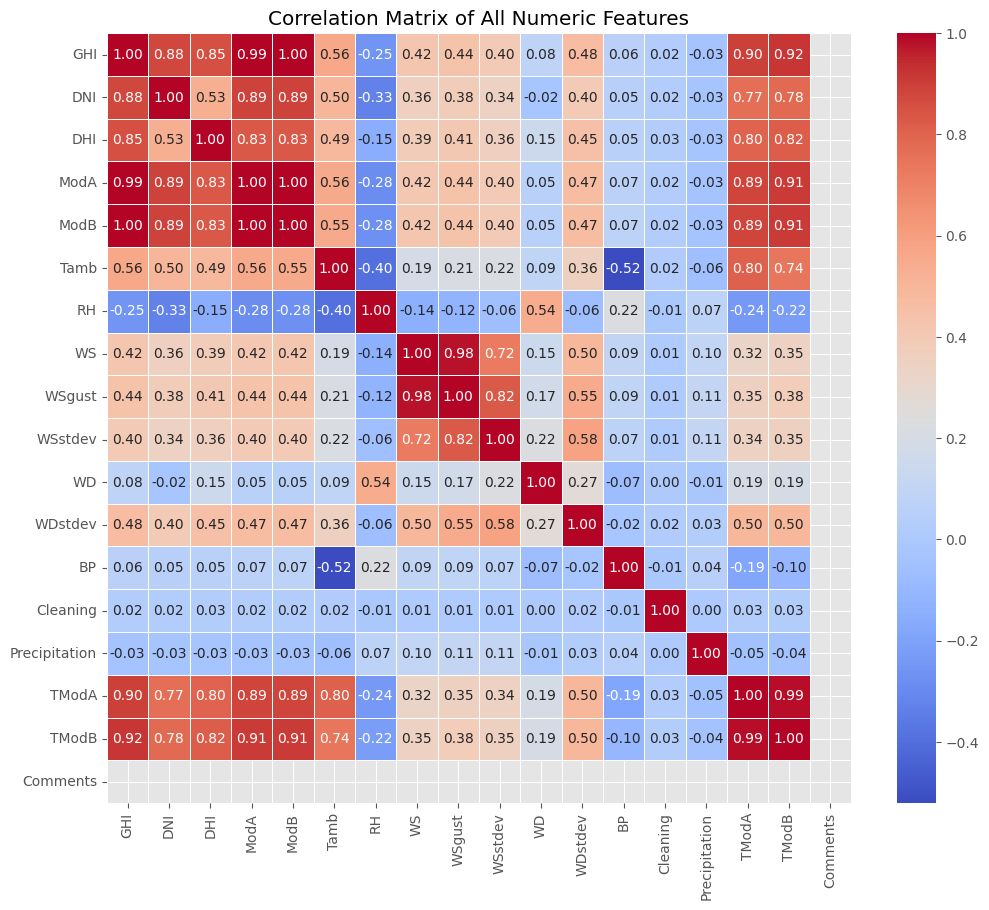

In [9]:
plt.figure(figsize=(12, 10))
correlation_matrix = df[numeric_features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of All Numeric Features')
plt.show()

## Time Series Analysis: Key Features Over Time

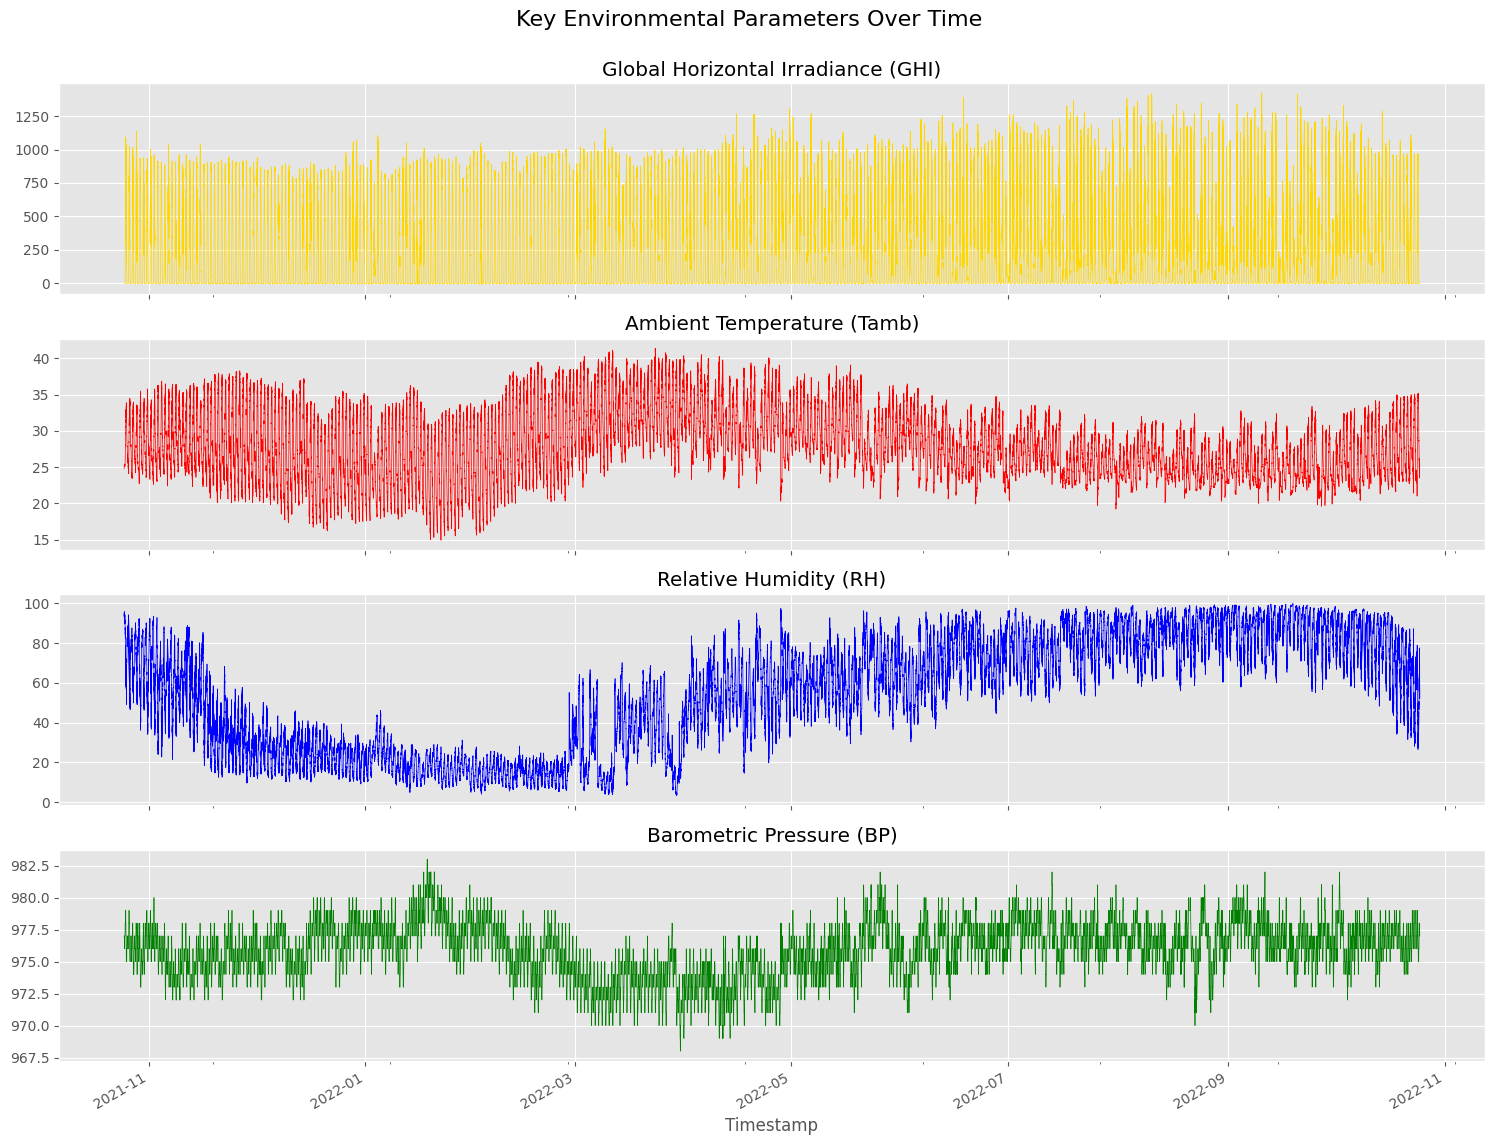

In [10]:
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(15, 12), sharex=True)
fig.suptitle('Key Environmental Parameters Over Time', fontsize=16)

df['GHI'].plot(ax=axes[0], title='Global Horizontal Irradiance (GHI)', color='gold', linewidth=0.5)
df['Tamb'].plot(ax=axes[1], title='Ambient Temperature (Tamb)', color='red', linewidth=0.5)
df['RH'].plot(ax=axes[2], title='Relative Humidity (RH)', color='blue', linewidth=0.5)
df['BP'].plot(ax=axes[3], title='Barometric Pressure (BP)', color='green', linewidth=0.5)

plt.xlabel('Timestamp')
plt.tight_layout(rect=[0, 0.03, 1, 0.98]) # Adjust layout to make room for suptitle
plt.show()